# Regression Homework - Laptop Price Prediction

## Introduction

Laptop prices vary according to the features of the laptop. In this project, we will predict the price of a laptop based on its features. We will use the dataset from the link below. The dataset contains the following columns:
- Company: The company that sells the laptop.
- TypeName: The type of the laptop.
- Inches: The size of the screen in inches.
- ScreenResolution: The resolution of the screen.
- Cpu: The Central Processing Unit of the laptop.
- Ram: The Random Access Memory of the laptop.
- Memory: The storage of the laptop.
- Gpu: The Graphics Processing Unit of the laptop.
- OpSys: The Operating System of the laptop.
- Weight: The weight of the laptop.
- Price: The price of the laptop.

## Importing Required Packages

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Importing Data


In [114]:
df = pd.read_csv('laptop_data.csv')

## EDA - Exploratory Data Analysis 

In [115]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [116]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [118]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [119]:
df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1037,1037,Toshiba,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.47kg,91908.00
711,711,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7440HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce 930MX,Linux,1.64kg,58021.92
259,259,Lenovo,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,512GB SSD,Nvidia GeForce GTX 1050M,Windows 10,2kg,90522.72
110,110,Asus,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce MX150,Windows 10,1.5kg,67239.36
315,315,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.33kg,44968.32


In [120]:
df.isnull().sum() 

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

## Feature Engineering 

In [121]:
df.Cpu.unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [122]:
df.Ram.unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [123]:
df.Company.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [124]:
df.TypeName.unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [125]:
cols = df.columns.tolist()  
price_index = cols.index('Price')
new_cols = [cols[price_index]] + cols[:price_index] + cols[price_index+1:]
df = df[new_cols] 

In [126]:
df.Ram = df.Ram.str.replace('GB','').astype('int')

In [127]:
df.Ram.unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64])

In [128]:
df.Weight.unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [129]:
# We drop corrupted data
# find not kg values
df[df['Weight'].str.contains('kg') == False]


,Price,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight


In [130]:
# we can see that the Weight column has 'kg' in the values, we should remove it and convert the values to float

df.Weight = df.Weight.str.replace('kg','').astype(float)
df.Weight.unique()

array([1.37 , 1.34 , 1.86 , 1.83 , 2.1  , 2.04 , 1.3  , 1.6  , 2.2  ,
       0.92 , 1.22 , 0.98 , 2.5  , 1.62 , 1.91 , 2.3  , 1.35 , 1.88 ,
       1.89 , 1.65 , 2.71 , 1.2  , 1.44 , 2.8  , 2.   , 2.65 , 2.77 ,
       3.2  , 0.69 , 1.49 , 2.4  , 2.13 , 2.43 , 1.7  , 1.4  , 1.8  ,
       1.9  , 3.   , 1.252, 2.7  , 2.02 , 1.63 , 1.96 , 1.21 , 2.45 ,
       1.25 , 1.5  , 2.62 , 1.38 , 1.58 , 1.85 , 1.23 , 1.26 , 2.16 ,
       2.36 , 2.05 , 1.32 , 1.75 , 0.97 , 2.9  , 2.56 , 1.48 , 1.74 ,
       1.1  , 1.56 , 2.03 , 1.05 , 4.4  , 1.29 , 1.95 , 2.06 , 1.12 ,
       1.42 , 3.49 , 3.35 , 2.23 , 4.42 , 2.69 , 2.37 , 4.7  , 3.6  ,
       2.08 , 4.3  , 1.68 , 1.41 , 4.14 , 2.18 , 2.24 , 2.67 , 2.14 ,
       1.36 , 2.25 , 2.15 , 2.19 , 2.54 , 3.42 , 1.28 , 2.33 , 1.45 ,
       2.79 , 1.84 , 2.6  , 2.26 , 3.25 , 1.59 , 1.13 , 1.78 , 1.15 ,
       1.27 , 1.43 , 2.31 , 1.16 , 1.64 , 2.17 , 1.47 , 3.78 , 1.79 ,
       0.91 , 1.99 , 4.33 , 1.93 , 1.87 , 2.63 , 3.4  , 3.14 , 1.94 ,
       1.24 , 4.6  ,

In [131]:
df.ScreenResolution.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [132]:
df.Memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [133]:
# we divide the Memory column into two: MemorySize and MemoryType.
# first we need to divide Memoty colum into 2 like Memory1 and Memory2 . beacuse some laptops have 2 memory types
df['Memory'] = df['Memory'].str.replace('Flash Storage', 'Flash_Storage')
df[['Memory1', 'Memory2']] = df['Memory'].str.split('+', expand=True)
df.Memory1.unique(), df.Memory2.unique()

(array(['128GB SSD', '128GB Flash_Storage', '256GB SSD', '512GB SSD',
        '500GB HDD', '256GB Flash_Storage', '1TB HDD',
        '32GB Flash_Storage', '128GB SSD ', '256GB SSD ',
        '64GB Flash_Storage', '32GB SSD', '2TB HDD', '64GB SSD',
        '1.0TB Hybrid', '512GB SSD ', '1TB SSD', '16GB SSD',
        '16GB Flash_Storage', '64GB Flash_Storage ', '180GB SSD',
        '1TB HDD ', '32GB HDD', '1TB SSD ', '512GB Flash_Storage',
        '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD'],
       dtype=object),
 array([None, '  1TB HDD', '  256GB SSD', '  2TB HDD', '  500GB HDD',
        '  512GB SSD', '  1.0TB Hybrid'], dtype=object))

In [134]:
#values are the same, we simplify them
df['Memory1'].nunique()

30

In [135]:
print(df.head())
df.Memory1 = df.Memory1.str.strip()
print(df.head())
df.Memory1.nunique()

         Price  Unnamed: 0 Company   TypeName  Inches  \
0   71378.6832           0   Apple  Ultrabook    13.3   
1   47895.5232           1   Apple  Ultrabook    13.3   
2   30636.0000           2      HP   Notebook    15.6   
3  135195.3360           3   Apple  Ultrabook    15.4   
4   96095.8080           4   Apple  Ultrabook    13.3   

                     ScreenResolution                         Cpu  Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz    8   
1                            1440x900        Intel Core i5 1.8GHz    8   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz    8   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz   16   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz    8   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS    1.37   
1  128GB Flash_Storage        Intel HD Graphics 6000  macOS    1.34   

24

In [136]:
df.Memory2 = df.Memory2.str.strip()
df.Memory2.unique()


array([None, '1TB HDD', '256GB SSD', '2TB HDD', '500GB HDD', '512GB SSD',
       '1.0TB Hybrid'], dtype=object)

In [137]:
df[['Memory1Size', 'Memory1Type']] = df['Memory1'].str.split(' ', expand=True)
df[['Memory2Size', 'Memory2Type']] = df['Memory2'].str.split(' ', expand=True)

In [138]:
df.Memory2Size.unique()


array([None, '1TB', '256GB', '2TB', '500GB', '512GB', '1.0TB'],
      dtype=object)

In [139]:
# Convert TB to GB
def to_gb(storage):
    if storage is None:
        return None
    if 'TB' in storage:
        num = float(storage.split('TB')[0].replace(' ', '')) * 1000
        storage = f'{int(num)}GB' + storage.split('TB')[1]
    return storage

df['Memory1Size'] = df['Memory1Size'].apply(to_gb)
df['Memory2Size'] = df['Memory2Size'].apply(to_gb)


In [140]:
df['Memory2Size'].unique()

array([None, '1000GB', '256GB', '2000GB', '500GB', '512GB'], dtype=object)

In [141]:
df['Memory2Size'].replace({None: np.nan}, inplace=True)
df['Memory2Type'].replace({None: np.nan}, inplace=True)

df['Memory2Size'].fillna("0GB", inplace=True)


In [142]:
df['Memory2Size'].unique()


array(['0GB', '1000GB', '256GB', '2000GB', '500GB', '512GB'], dtype=object)

In [143]:
df.Memory1Size = df.Memory1Size.str.replace('GB','').astype('int64')
df.Memory2Size = df.Memory2Size.str.replace('GB','').astype('int64')

In [144]:
# now, we can drop the Memory, Memory1 and Memory2 columns
df = df.drop(['Memory','Memory1', 'Memory2'], axis=1)

In [145]:
# and , the Unnamed: 0 column look like an index column, we can drop it
df = df.drop('Unnamed: 0', axis=1)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1303 non-null   float64
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Memory1Size       1303 non-null   int64  
 11  Memory1Type       1303 non-null   object 
 12  Memory2Size       1303 non-null   int64  
 13  Memory2Type       208 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 142.6+ KB


In [147]:
df.Ram = df.Ram.astype('int64')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1303 non-null   float64
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Memory1Size       1303 non-null   int64  
 11  Memory1Type       1303 non-null   object 
 12  Memory2Size       1303 non-null   int64  
 13  Memory2Type       208 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 142.6+ KB


In [149]:
df.corr(numeric_only=True)

,Price,Inches,Ram,Weight,Memory1Size,Memory2Size
Price,1.000000,0.068197,0.743007,0.210370,-0.122365,0.295004
Inches,0.068197,1.000000,0.237993,0.827631,0.269511,0.386670
Ram,0.743007,0.237993,1.000000,0.383874,0.018271,0.391826
Weight,0.210370,0.827631,0.383874,1.000000,0.179962,0.479133
Memory1Size,-0.122365,0.269511,0.018271,0.179962,1.000000,-0.245546
Memory2Size,0.295004,0.386670,0.391826,0.479133,-0.245546,1.000000


In [150]:
df.OpSys.unique()    

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [151]:
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

df['ScreenResolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')
df[['Resolution_Width', 'Resolution_Height']] = df['ScreenResolution'].str.split('x', expand=True)
df.Resolution_Width = df.Resolution_Width.astype('int64')
df.Resolution_Height = df.Resolution_Height.astype('int64')


In [152]:

df['PPI'] = (((df['Resolution_Width']**2) + (df['Resolution_Height']**2))**0.5/df['Inches']).astype('float')

df.drop(['ScreenResolution','Resolution_Width','Resolution_Height'], axis=1, inplace=True)

<Axes: >

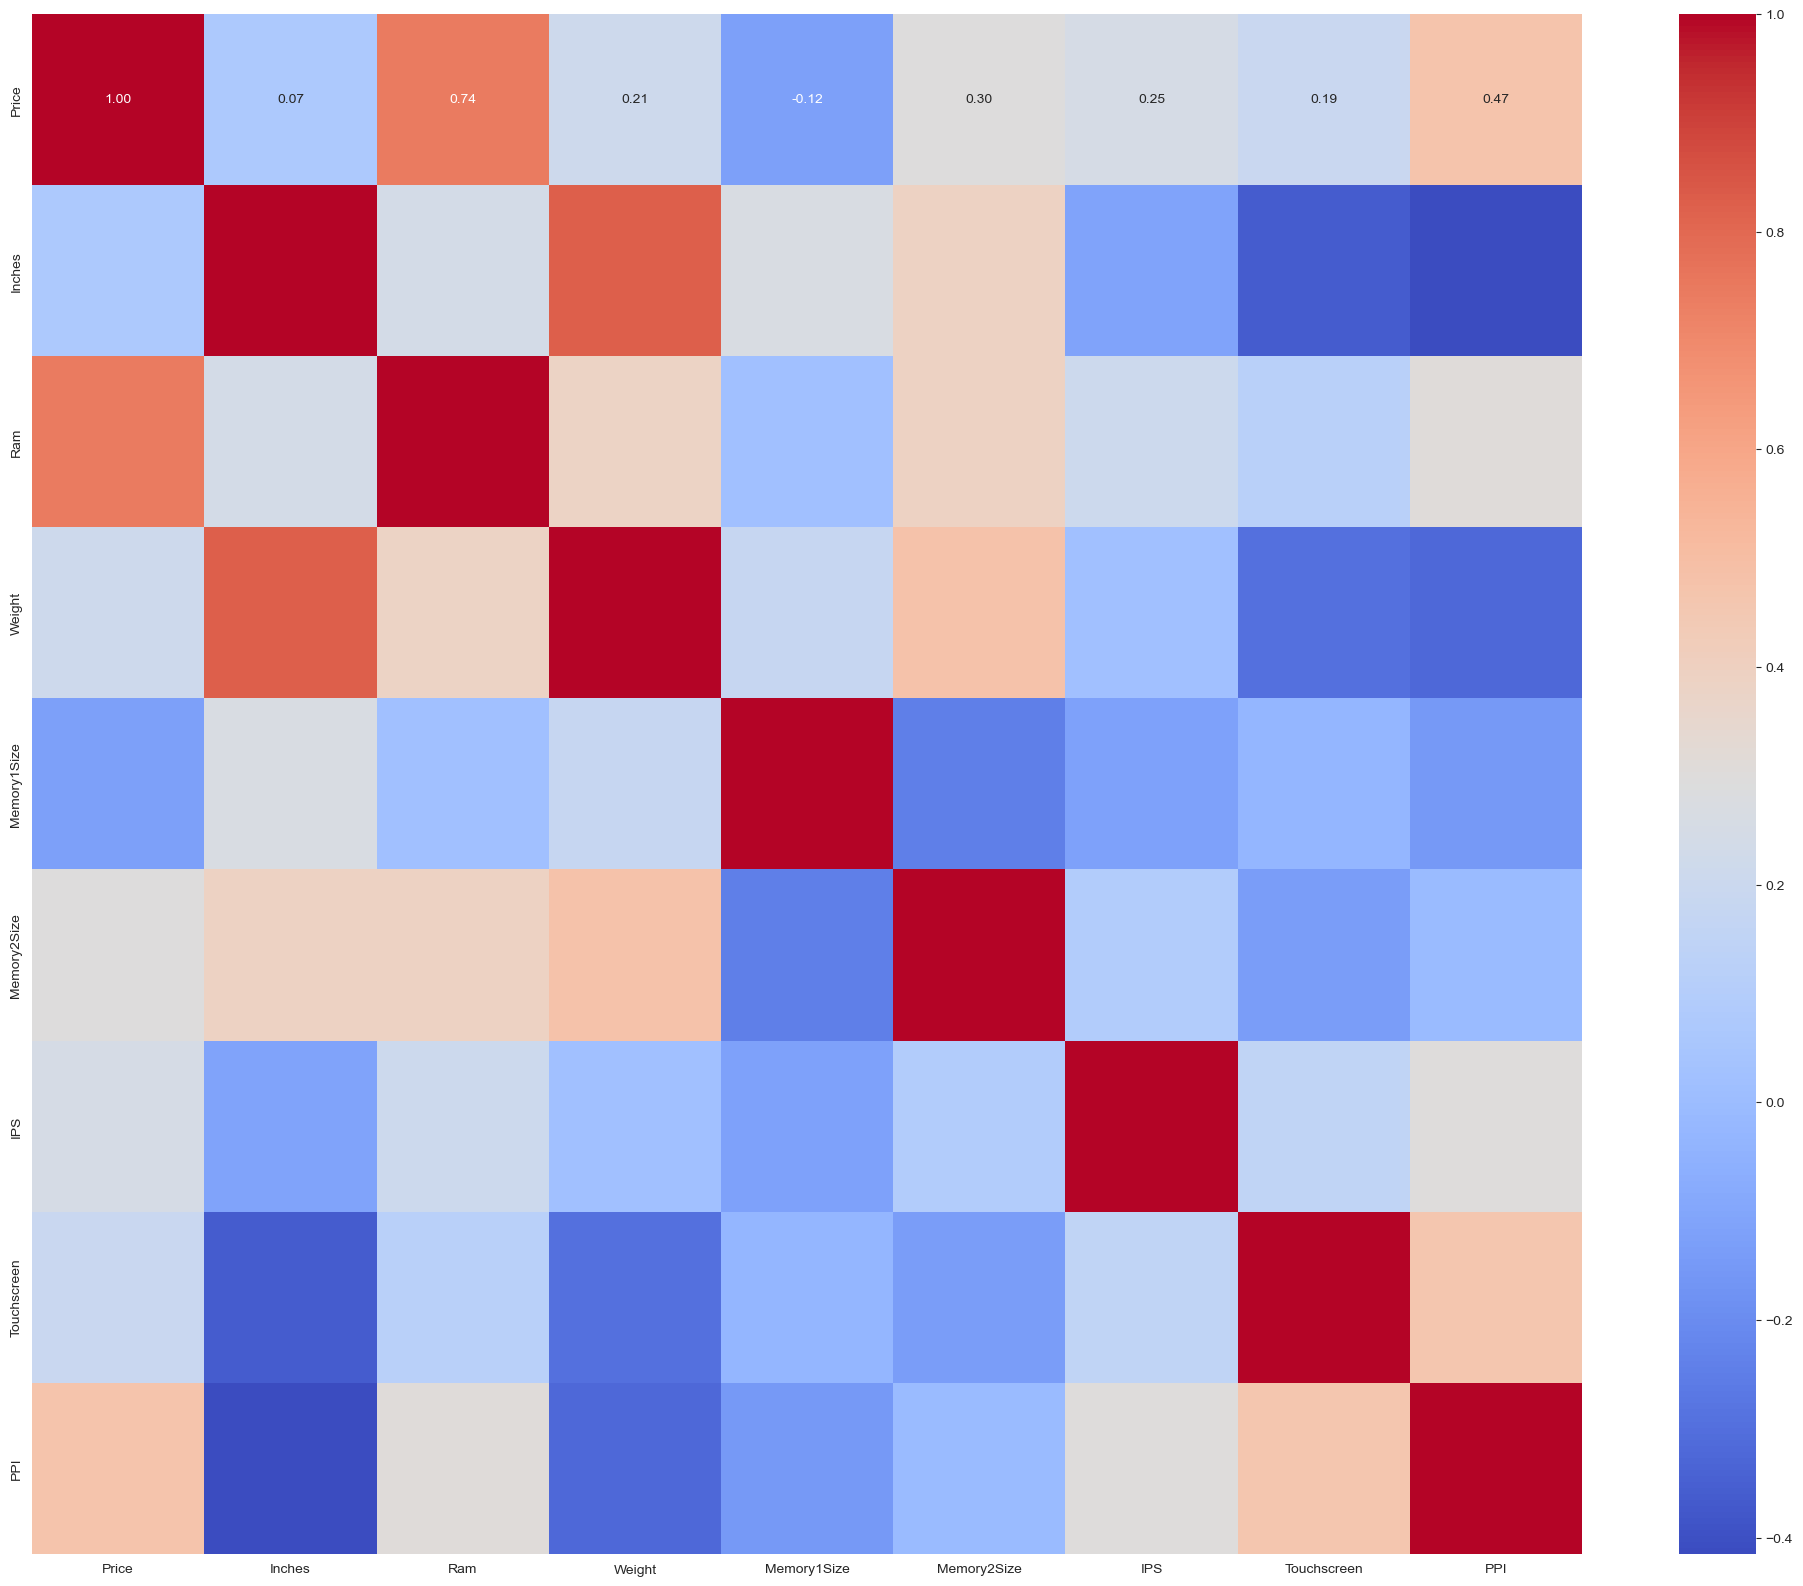

In [153]:
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')

In [154]:
df.head()

,Price,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Memory1Size,Memory1Type,Memory2Size,Memory2Type,IPS,Touchscreen,PPI
0,71378.6832,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,128,SSD,0,NaN,1,0,226.983005
1,47895.5232,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,128,Flash_Storage,0,NaN,0,0,127.677940
2,30636.0000,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,256,SSD,0,NaN,0,0,141.211998
3,135195.3360,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,512,SSD,0,NaN,1,0,220.534624
4,96095.8080,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,256,SSD,0,NaN,1,0,226.983005


In [155]:
abs(df.corr(numeric_only=True)['Price']).sort_values(ascending=False)

Price          1.000000
Ram            0.743007
PPI            0.473487
Memory2Size    0.295004
IPS            0.252208
Weight         0.210370
Touchscreen    0.191226
Memory1Size    0.122365
Inches         0.068197
Name: Price, dtype: float64

In [156]:
df.describe()

,Price,Inches,Ram,Weight,Memory1Size,Memory2Size,IPS,Touchscreen,PPI
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,59870.042910,15.017191,8.382195,2.038734,442.615503,168.288565,0.280123,0.147352,146.635987
std,37243.201786,1.426304,5.084665,0.665475,356.225802,402.618575,0.449231,0.354593,43.121345
min,9270.720000,10.100000,2.000000,0.690000,8.000000,0.000000,0.000000,0.000000,90.583402
25%,31914.720000,14.000000,4.000000,1.500000,256.000000,0.000000,0.000000,0.000000,127.335675
50%,52054.560000,15.600000,8.000000,2.040000,256.000000,0.000000,0.000000,0.000000,141.211998
75%,79274.246400,15.600000,8.000000,2.300000,512.000000,0.000000,1.000000,0.000000,157.350512
max,324954.720000,18.400000,64.000000,4.700000,2000.000000,2000.000000,1.000000,1.000000,352.465147


<Axes: xlabel='Memory1Size', ylabel='Price'>

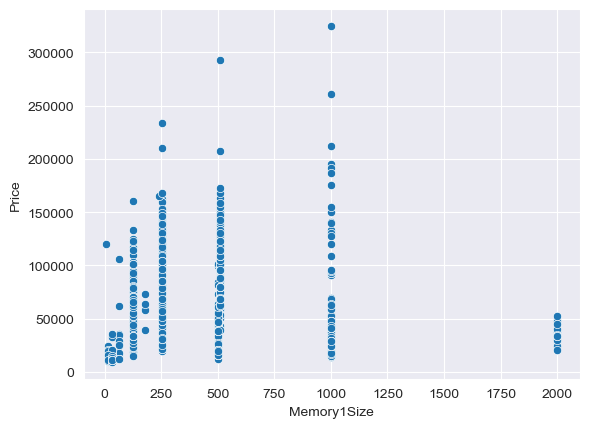

In [157]:
sns.scatterplot(x='Memory1Size', y='Price', data=df)

<Axes: xlabel='Price'>

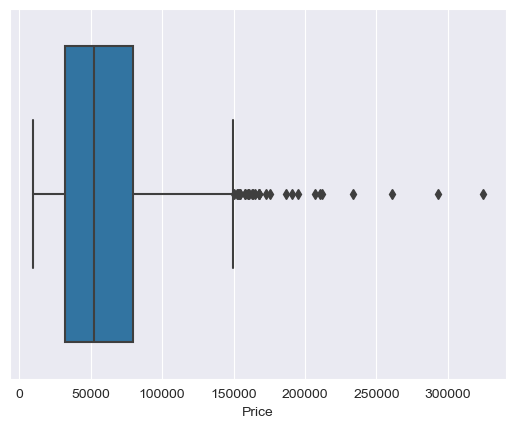

In [158]:
sns.boxplot(x='Price', data=df)

/home/cevheri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

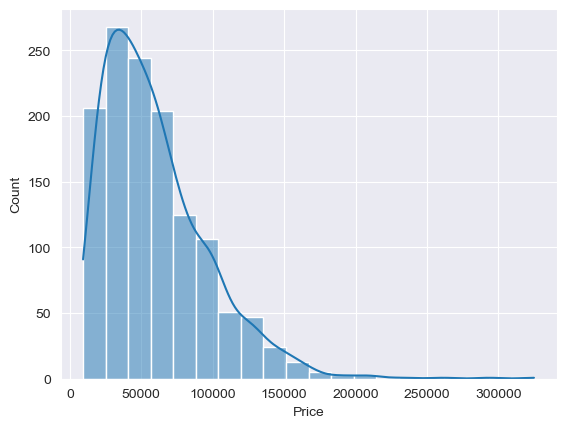

In [159]:

sns.histplot(x=df['Price'], kde=True, bins=20)

<Axes: >

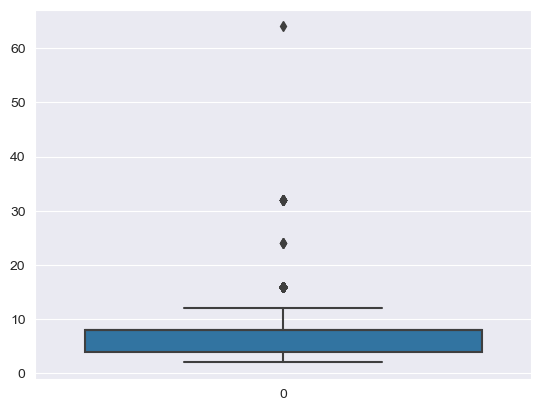

In [160]:
sns.boxplot(df['Ram'])

/home/cevheri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Count'>

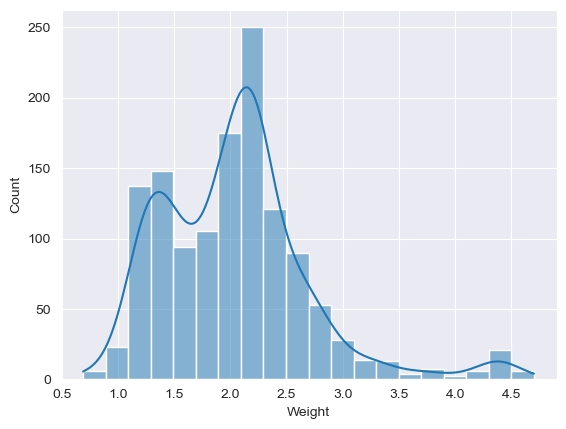

In [161]:
sns.histplot(x= df['Weight'], bins=20, kde=True)

<Axes: ylabel='Weight'>

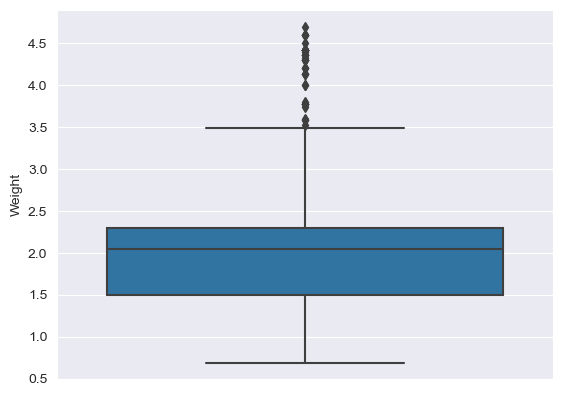

In [162]:
sns.boxplot(y=df['Weight'])

<Axes: xlabel='PPI'>

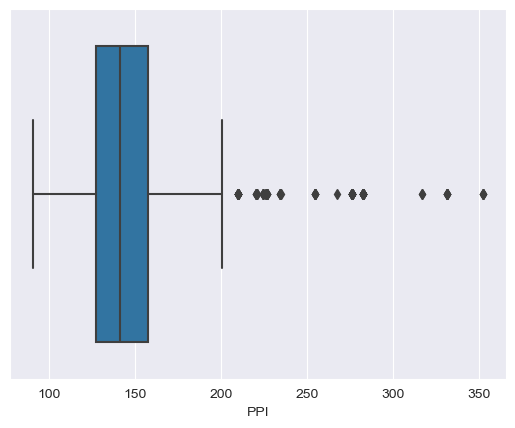

In [163]:
sns.boxplot(x='PPI', data=df)

<Axes: xlabel='Memory1Size'>

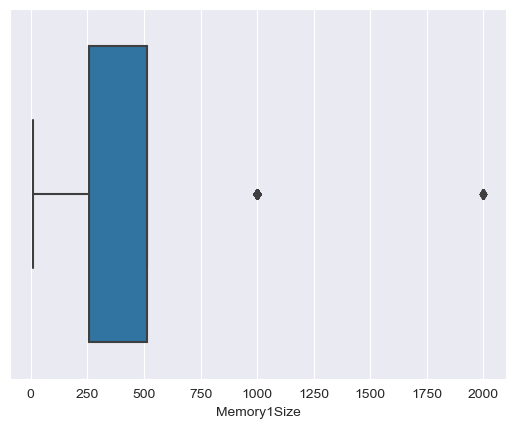

In [164]:
sns.boxplot(x=df['Memory1Size'])

<Axes: xlabel='Ram', ylabel='Price'>

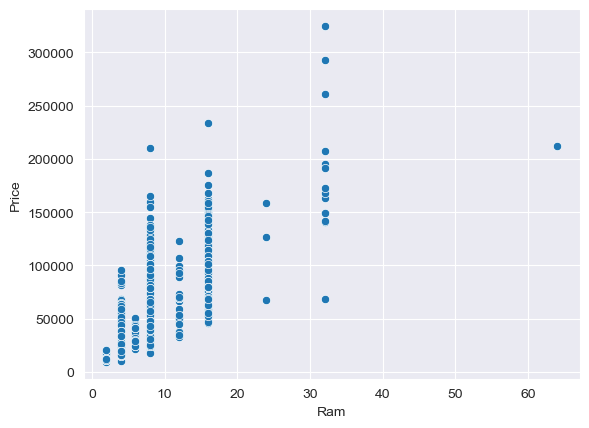

In [165]:
sns.scatterplot(data=df, x='Ram', y='Price')

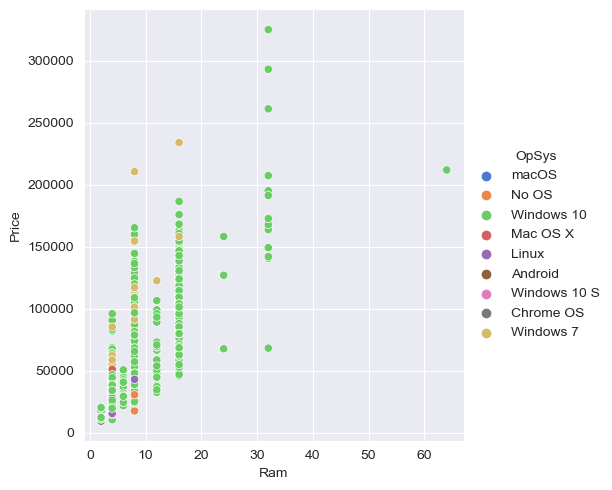

In [166]:
sns.relplot(data=df, x='Ram', y='Price', hue='OpSys', palette='muted')

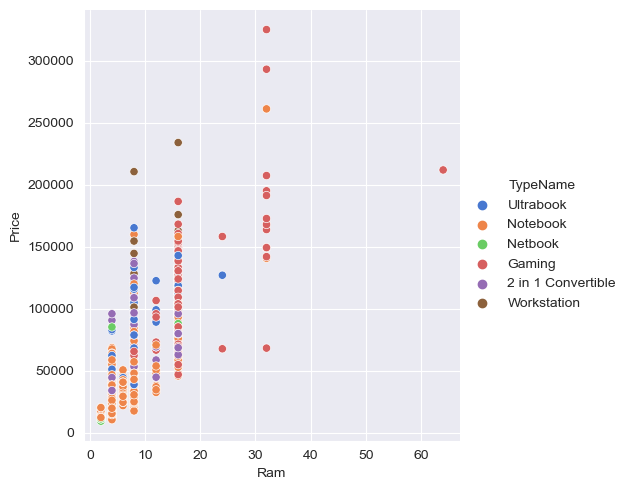

In [167]:
sns.relplot(data=df, x='Ram', y='Price', hue='TypeName', palette='muted')

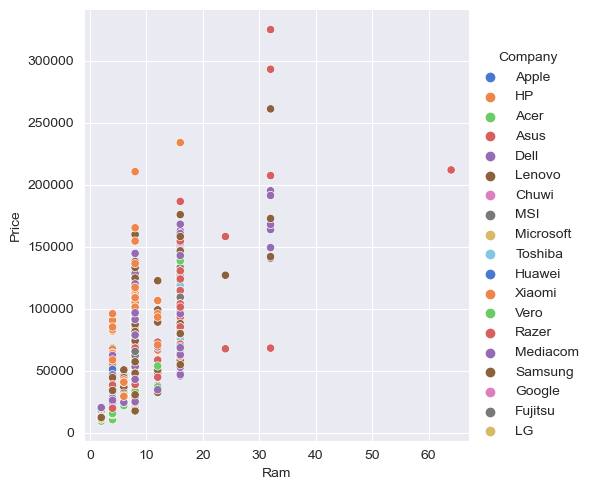

In [168]:
sns.relplot(data=df, x='Ram', y='Price', hue='Company', palette='muted')

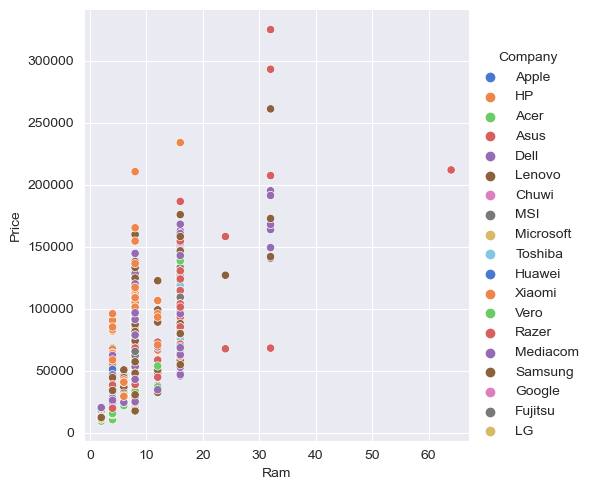

In [169]:
sns.relplot(data=df, x='Ram', y='Price', hue='Company', palette='muted')

### Removing Outliers

In [170]:
outliers = df.quantile(q = 0.97, numeric_only=True)

In [171]:
df = df[df['Price'] < outliers['Price']]
df = df[df['PPI'] < outliers['PPI']]

/home/cevheri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

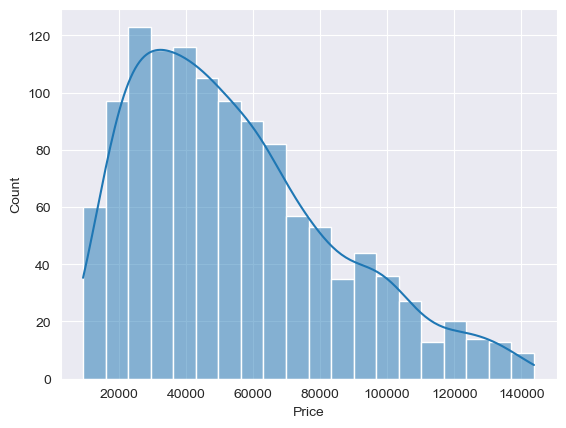

In [172]:
sns.histplot(x=df['Price'], kde=True, bins=20)

<Axes: xlabel='Price'>

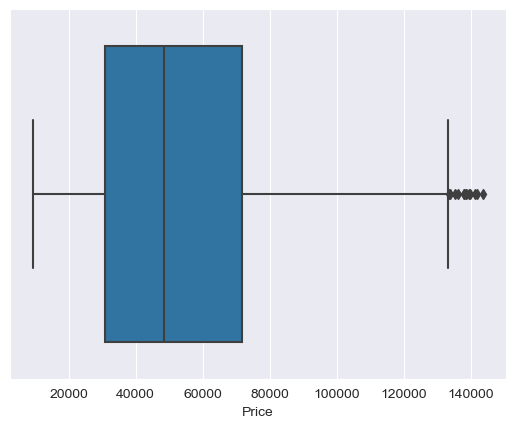

In [173]:
sns.boxplot(x=df.Price)

<Axes: xlabel='PPI'>

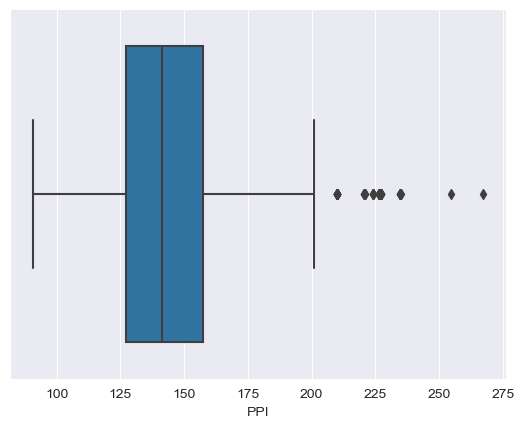

In [174]:
sns.boxplot(x=df.PPI)

In [175]:
# since these columns are very important, we square them
df['Ram'] = df['Ram'] ** 2
df['PPI'] = df['PPI'] ** 2

### Modelling

In [176]:
x = df.drop(['Price'], axis=1)
y = df['Price']

In [181]:
x = pd.get_dummies(x, drop_first=True)


In [182]:
import algo_test as algo

In [183]:
algo.algo_test(x,y)

/home/cevheri/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.754e+10, tolerance: 8.535e+07
  model = cd_fast.enet_coordinate_descent(
/home/cevheri/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,R_Squared,RMSE,MAE
XGBRegressor,8.434219e-01,1.204812e+04,8.165126e+03
Gradient Boosting,8.277138e-01,1.263801e+04,9.160448e+03
Lasso,7.843369e-01,1.413974e+04,9.835418e+03
Ridge,7.775108e-01,1.436177e+04,9.973107e+03
Linear,7.643765e-01,1.477961e+04,1.061409e+04
Decision Tree,7.103035e-01,1.638797e+04,1.083594e+04
AdaBoost,7.041864e-01,1.656009e+04,1.159141e+04
Extra Tree,6.452464e-01,1.813498e+04,1.181312e+04
KNeighborsRegressor,6.415507e-01,1.822919e+04,1.488565e+04
ElasticNet,6.133842e-01,1.893186e+04,1.399033e+04
